In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
train = pd.read_csv('titanic_data/train.csv')
test = pd.read_csv('titanic_data/test.csv')
data = pd.concat([train, test])

In [51]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [53]:
data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 92.0+ KB


In [55]:
data.dropna(inplace=True)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    float64
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 50.1+ KB


In [57]:
x = data.iloc[:, 1:]
y = pd.DataFrame(data['Survived'])

In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x.iloc[:, 1] = label_encoder.fit_transform(x.iloc[:, 1])
x.iloc[:, -1] = label_encoder.fit_transform(x.iloc[:, -1])
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x[:10]

array([[ 0.90859974,  0.75613751, -0.52766856,  0.52251079, -0.50678737,
        -0.51637992,  0.51958818],
       [-1.48298257, -1.32251077,  0.57709388,  0.52251079, -0.50678737,
         0.69404605, -2.04948671],
       [ 0.90859974, -1.32251077, -0.25147795, -0.55271372, -0.50678737,
        -0.50362035,  0.51958818],
       [-1.48298257, -1.32251077,  0.36995092,  0.52251079, -0.50678737,
         0.35032585,  0.51958818],
       [ 0.90859974,  0.75613751,  0.36995092, -0.55271372, -0.50678737,
        -0.50125747,  0.51958818],
       [-1.48298257,  0.75613751,  1.68185631, -0.55271372, -0.50678737,
         0.3269333 ,  0.51958818],
       [ 0.90859974,  0.75613751, -1.9086216 ,  2.67295981,  0.66474707,
        -0.25504498,  0.51958818],
       [ 0.90859974, -1.32251077, -0.1824303 , -0.55271372,  1.83628152,
        -0.44297363,  0.51958818],
       [-0.28719141, -1.32251077, -1.08004977,  0.52251079, -0.50678737,
        -0.08499674, -2.04948671],
       [ 0.90859974, -1.3225

In [61]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2,\
                                                    random_state = 0)

In [62]:
x.shape

(712, 7)

In [63]:
from keras.layers import Dense
from keras.models import Sequential

my_classifier = Sequential()

my_classifier.add(Dense(units = 20, kernel_initializer = 'uniform',
                        activation = 'relu', input_dim = x.shape[1]))

my_classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                        activation = 'sigmoid'))

my_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

Metal device set to: Apple M1 Pro


2022-01-14 19:57:06.297953: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-14 19:57:06.298219: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [64]:
history = my_classifier.fit(x_train, y_train, validation_split=0.2,
                            batch_size = 10, epochs = 100)

2022-01-14 19:57:29.046802: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-14 19:57:29.185277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
46/46 [==============================] - 1s 11ms/step - loss: 0.6901 - accuracy: 0.5956 - val_loss: 0.6808 - val_accuracy: 0.7193
Epoch 2/100
22/46 [=============>................] - ETA: 0s - loss: 0.6763 - accuracy: 0.7227

2022-01-14 19:57:29.858497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 0s 7ms/step - loss: 0.6685 - accuracy: 0.7319 - val_loss: 0.6410 - val_accuracy: 0.7719
Epoch 3/100
46/46 [==============================] - 0s 7ms/step - loss: 0.6187 - accuracy: 0.7846 - val_loss: 0.5775 - val_accuracy: 0.8070
Epoch 4/100
46/46 [==============================] - 0s 7ms/step - loss: 0.5589 - accuracy: 0.7978 - val_loss: 0.5118 - val_accuracy: 0.8070
Epoch 5/100
46/46 [==============================] - 0s 7ms/step - loss: 0.5127 - accuracy: 0.7890 - val_loss: 0.4725 - val_accuracy: 0.8070
Epoch 6/100
46/46 [==============================] - 0s 7ms/step - loss: 0.4865 - accuracy: 0.7956 - val_loss: 0.4478 - val_accuracy: 0.8070
Epoch 7/100
46/46 [==============================] - 0s 6ms/step - loss: 0.4706 - accuracy: 0.7934 - val_loss: 0.4343 - val_accuracy: 0.7982
Epoch 8/100
46/46 [==============================] - 0s 7ms/step - loss: 0.4612 - accuracy: 0.7890 - val_loss: 0.4256 - val_accuracy: 0.7982
Epoch 9/100
46/46 [======

In [66]:
y_pred_test = my_classifier.predict(x_test)
y_pred_test = (y_pred_test > 0.5)

2022-01-14 19:58:36.757610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [193]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_test)

0.8181818181818182

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[76,  6],
       [20, 41]])

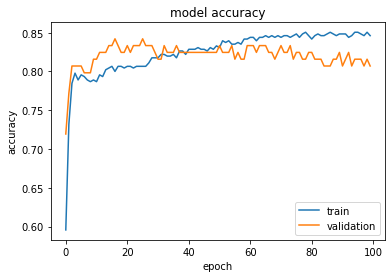

In [68]:
plt.subplots() # open a new plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

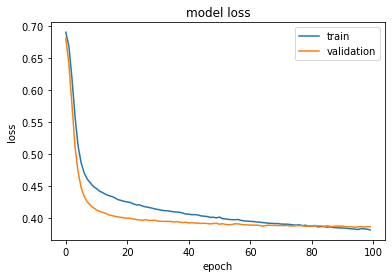

In [69]:
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [245]:
from keras.layers import Dropout

my_classifier2 = Sequential()

my_classifier2.add(Dense(units=20, kernel_initializer = 'uniform',
                        activation = 'relu', input_dim = x.shape[1]))

my_classifier2.add(Dropout(0.2, seed=42))

my_classifier2.add(Dense(units=10, kernel_initializer = 'uniform',
                        activation = 'relu'))

my_classifier2.add(Dense(units = 1, kernel_initializer = 'uniform',
                        activation = 'sigmoid'))

my_classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

In [246]:
history2 = my_classifier2.fit(x_train,
                              y_train,
                              validation_split=0.2,
                              batch_size=10,
                              epochs=100)

Epoch 1/100
 1/46 [..............................] - ETA: 11s - loss: 0.6932 - accuracy: 0.4000

2022-01-14 20:38:34.540566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 1s 12ms/step - loss: 0.6911 - accuracy: 0.5890 - val_loss: 0.6861 - val_accuracy: 0.6316
Epoch 2/100
 9/46 [====>.........................] - ETA: 0s - loss: 0.6834 - accuracy: 0.6556

2022-01-14 20:38:35.104484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 0s 8ms/step - loss: 0.6786 - accuracy: 0.6352 - val_loss: 0.6562 - val_accuracy: 0.7895
Epoch 3/100
46/46 [==============================] - 0s 7ms/step - loss: 0.6269 - accuracy: 0.7780 - val_loss: 0.5695 - val_accuracy: 0.7982
Epoch 4/100
46/46 [==============================] - 0s 7ms/step - loss: 0.5455 - accuracy: 0.8044 - val_loss: 0.4812 - val_accuracy: 0.8070
Epoch 5/100
46/46 [==============================] - 0s 8ms/step - loss: 0.4853 - accuracy: 0.7934 - val_loss: 0.4366 - val_accuracy: 0.8070
Epoch 6/100
46/46 [==============================] - 0s 7ms/step - loss: 0.4627 - accuracy: 0.8000 - val_loss: 0.4207 - val_accuracy: 0.7982
Epoch 7/100
46/46 [==============================] - 0s 8ms/step - loss: 0.4574 - accuracy: 0.7956 - val_loss: 0.4145 - val_accuracy: 0.7982
Epoch 8/100
46/46 [==============================] - 0s 8ms/step - loss: 0.4516 - accuracy: 0.7934 - val_loss: 0.4110 - val_accuracy: 0.8158
Epoch 9/100
46/46 [======

In [247]:
y_pred_test2 = my_classifier2.predict(x_test)
y_pred_test2 = (y_pred_test2 > 0.5)

2022-01-14 20:39:09.166056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [248]:
accuracy_score(y_test, y_pred_test2)

0.7972027972027972

In [249]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred_test2)
cm2

array([[73,  9],
       [20, 41]])

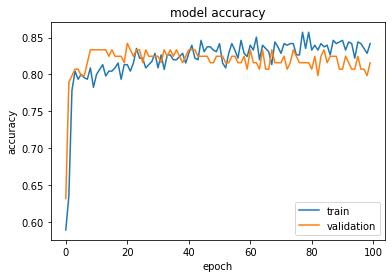

In [250]:
plt.subplots() # open a new plot
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

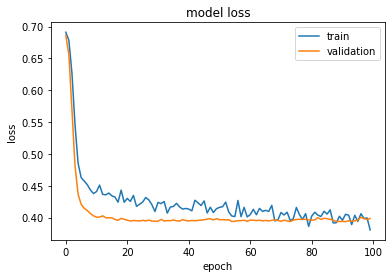

In [251]:
plt.subplots() # open a new plot
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()